In [ ]:
import numpy as np
import pandas as pd

df1=pd.read_excel(r'E:\Gayathri\Mndlz\2023_Expand_Mdlz\Workout_data\SST_Full_Data.xlsx')

Big_Main=[]
for i in df1.groupby('State Name'):
    print(i[0])
    main=[]
    for k in i[1].groupby('SST Code'):
        df=k[1]
  
        from sklearn.cluster import DBSCAN
        db = DBSCAN(eps = 0.6, min_samples = 2).fit(df[['Latitude','Longitude']].values)
        df['Labels']=db.labels_
        # print(k[0],db.labels_)

        # print(df['RLA'].sum(),df['Average Sales'].mean(),len(df))
        
        dic1={'State':i[0],'SST Code':k[0],'No of SubD':len(df['SubD Code']),'Average Sales':df['Average Sales'].sum()}
        
        if len(df)>1:
            val=df['Labels'].value_counts().sort_values(ascending=False).index[0]
            dic1['Mean Distance']=df[df['Labels']==val]['Distance'].mean()
        else:
            dic1['Mean Distance']=df['Distance'].mean()
        main.append(pd.DataFrame([dic1]))

    dat=pd.concat(main)
    dat=dat.reset_index().iloc[:,1:]

    def fun1(col):
        dat.loc[dat.loc[dat[col].between(round(dat[col].mean()*0.7),round(dat[col].mean()*0.3+dat[col].mean()))].index,col+'_val'] = 'Medium'
        dat.loc[dat[dat[col]<round(dat[col].mean()*0.7)].index,col+'_val']="Low"
        dat.loc[dat[dat[col]>round(dat[col].mean()*0.3+dat[col].mean())].index,col+'_val']="High"

    list(map(fun1,list(dat.columns[2:])[:1]+[list(dat.columns[2:])[-1]]))
    
    dat.loc[dat.loc[dat['Average Sales'].between(round(dat['Average Sales'].mean()*0.6),round(dat['Average Sales'].mean()*0.4+dat['Average Sales'].mean()))].index,'Average Sales'+'_val'] = 'Medium'
    dat.loc[dat[dat['Average Sales']<round(dat['Average Sales'].mean()*0.6)].index,'Average Sales'+'_val']="Low"
    dat.loc[dat[dat['Average Sales']>round(dat['Average Sales'].mean()*0.4+dat['Average Sales'].mean())].index,'Average Sales'+'_val']="High"
    Big_Main.append(dat)
    
pd.concat(Big_Main).to_csv(r'E:\Gayathri\Mndlz\2023_Expand_Mdlz\Output\SST_Level.csv')

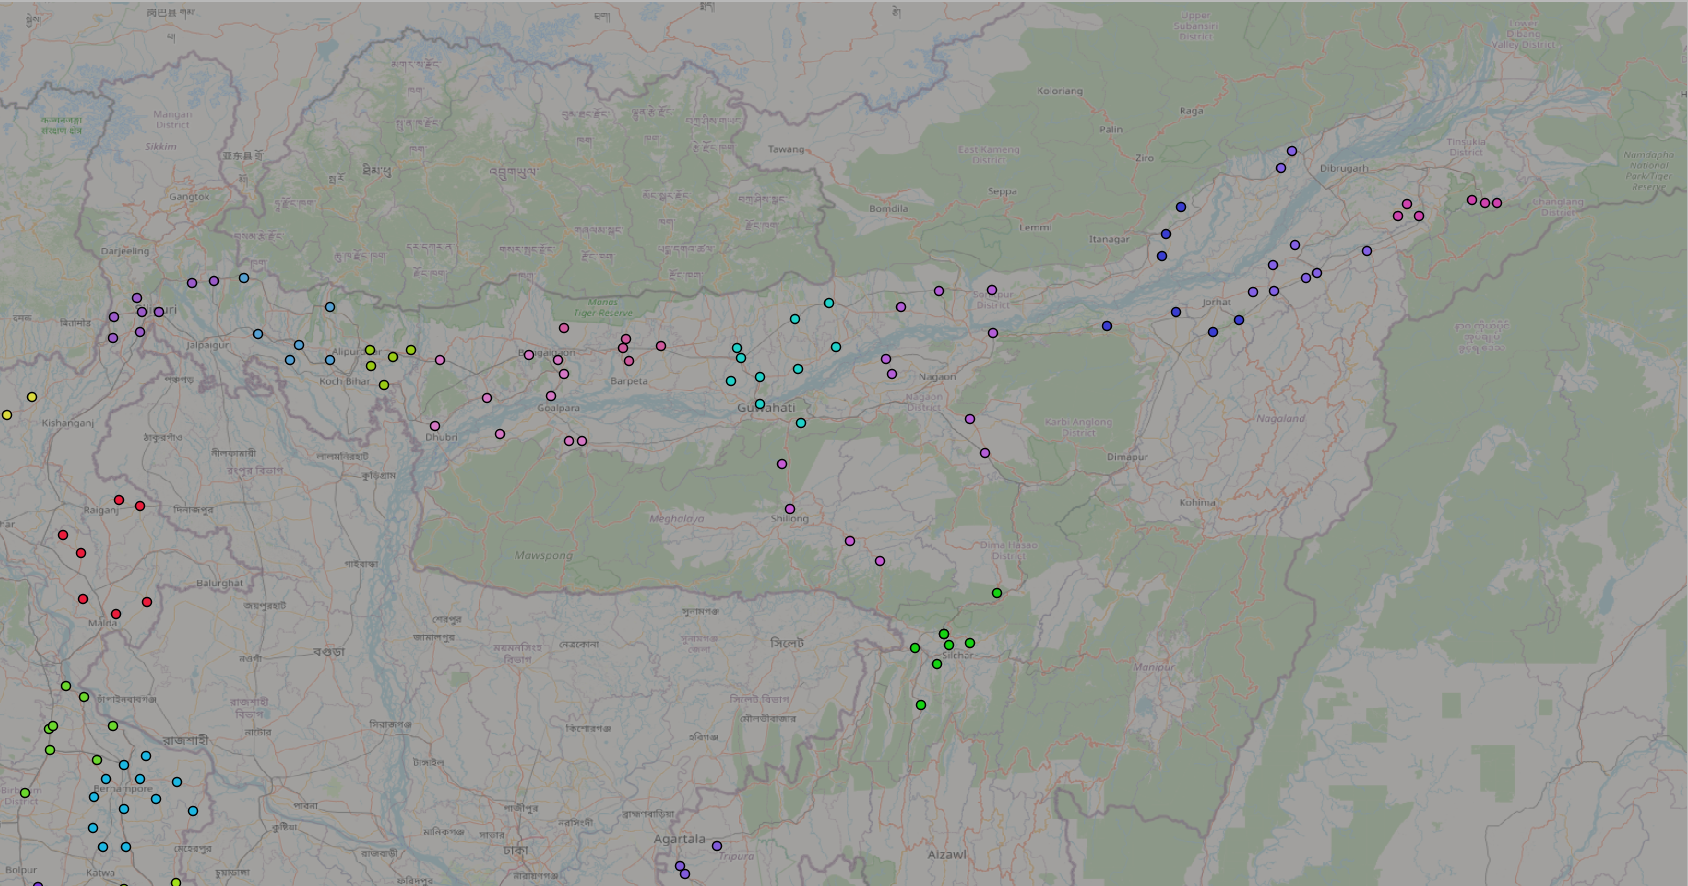

In [7]:
from IPython.display import Image, display
display(Image(filename=r'C:\Users\Sort\Documents\IPMsg\ipmsg_img\ipmsgclip_s_1697619471_0.png'))